In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Login into GEE
import ee
ee.Authenticate()
ee.Initialize()


In [ ]:
!pip install rasterio rasterstats fiona geopandas earthpy

In [ ]:
# Import the path of the packages auto_download
import sys
pathg = 'floodingprocess'
area = 'Dagana'
sys.path.append( pathg+'/' )
from flooding_detection_sentinel2 import *
from download_s2 import *
from sentinel1workflow import *

# Download images

In [ ]:
# Variables
# GEE API
api = ee
# The boundary path : an GEE asset
boundaries_path = "asset/dagana" 

variable = 'mndwi'  # THis can take value such as : cloud, rgb, ndvi , 

# save folder

start_date = '-01-01'
end_date = '-02-14'

folder ="DHS_Dagana_2023"

# Cloud filter percentage
cloud_percentage =100

# The method to apply to the image collection. There are 2 main method : mosaic and median
function='mosaic'

generate_im1 = download_s2_images ( api, boundaries_path, start_date,end_date, cloud_percentage=cloud_percentage, function=function, folder=folder )

# This will download all images mosaic by dates and will do so regardless if thw area is fully covered or not
tasks = generate_im1.getAll_images( [variable], next_date= 1 ) 

# The following will process all images within 5 days interval each time . In this it is more likely to have fully covered imagery as sentinel is a satellite of 5 days cycle.
# tasks = generate_im1.getAll_images_by_interval([variable ],interval =5)

# Run the process on GEE
for tsk in tasks :
    tsk.start()

## Visualizing RGB Images and Selecting a Reference Image for Computing Flooding Events

It is recommended to choose the start_date for downloading imagery based on the date of the reference image.
The reference image is the first image within the specified date range that is used to remove water content from the map and reduce noise.
One way to choose the reference image is by visually inspecting the RGB images and selecting an image with minimal or no visible cloud cover. Alternatively, we can select the first image within the specified date range that has a cloud probability of less than 20% as the reference image.

In [ ]:
# The following code is used to visualize RGB images and select the first image to use as a reference for computing the flooding events. 

#------------------------------------------
start_date= '2023-01-01' # this is just to illustrate
end_date = '2023-02-10'
# Variables
# GEE API
api = ee
# The boundary path : an GEE asset
boundaries_path = "asset_path"  
variable = 'rgb' 
function='mosaic'
cloud_percentage=100
folder = 'saved_folder_name'

# generate_im1 = download_s2_images (api, boundaries_path, start_date,end_date, cloud_percentage=cloud_percentage, function=function, folder=folder)
# you can specify the zoom point
centerpoint  = [ -16,16.3, 9.5 ]
tasks1 = generate_im1.getAll_images_by_interval ( types = ['variable'] , mask= False, export_image = centerpoint, interval = 5  )
tasks1


# Generate maps

In [ ]:
"""# GENERATE FLOODING"""
path = 'DRY_HOT_SEASON/' +area+'/IMAGES'

area = 'DAGANA'
pathmaps = 'DRY_HOT_SEASON/' +area+'/MAPS'
create_folder(pathmaps)

data_path_mndwi = 'DRY_HOT_SEASON/'+area+'/IMAGES/2023/mndwi/*'
data_path_cloud = 'DRY_HOT_SEASON/'+ area +'/IMAGES/2023/cloud/*'
rgb_img =  'earthengine/NEWTEST/rgb_2021-01-02.tif'

savepath = pathmaps + '/flooding_map_'+area+'2023.tif'
arr = flooding_module( data_path_mndwi, data_path_cloud,rgb_img, savepath )


2023-01-07 2023-01-07
2023-01-12 2023-01-12
2023-01-17 2023-01-17
2023-01-22 2023-01-22
2023-01-27 2023-01-27
2023-02-01 2023-02-01
2023-02-06 2023-02-06
2023-02-11 2023-02-11


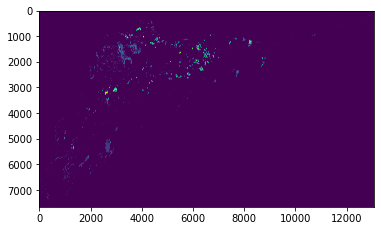

In [ ]:
mp = rio.open(savepath).read(1)

show(mp)

In [ ]:
area_name= 'DAGANA'
pathmaps = 'DRY_HOT_SEASON/' +area_name+'/MAPS'
# "/content/drive/MyDrive/earthengine/2023_DELIVERABLE/DRY_HOT_SEASON/DAGANA/MAPS/flooding_map2023.tif"
savepath = pathmaps + '/flooding_map_'+area_name+'2023.tif'

## Generate dataframe

In [ ]:
#=====================================FLOODING
area_name= 'DAGANA'
operation = 'flooding'
period = 'HOT_DRY_SEASON'
season = 'crossing_years_NO' #'crossing_years' 

grid_name = 'DRY_HOT_SEASON/DAGANA/GRID52'
grid_path = 'boundaries/grid52_dagana.geojson'


for year in ['2023']:
  rgb_img = 'rgb_2021-01-02.tif'

  output_path = grid_name + '/'+ year

  map_path = pathmaps + '/flooding_map_'+area_name+'2023.tif'

  update_df ( season, output_path, rgb_img, grid_path, area_name,  operation, year, map_path )
